<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/RegressionAnalysis_with_XGBoostKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import os
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 14

In [77]:
df_ocean =  pd.read_csv("/content/sample_data/bottle.csv")
df_ocean2 = pd.read_csv("/content/sample_data/cast.csv")
df_ocean[0:5]

<ipython-input-77-643319e224f3>:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocean =  pd.read_csv("/content/sample_data/bottle.csv")
<ipython-input-77-643319e224f3>:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocean2 = pd.read_csv("/content/sample_data/cast.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Description of data frame

In [78]:
description = df_ocean2.describe()
description

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [79]:
information = df_ocean2.info()
information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [80]:
df_ocean.shape

(864863, 74)

Read Null Value in terms of % in every columns

In [81]:
nul = df_ocean.isnull().sum() / len(df_ocean)
nul = nul[nul>0]
nul = nul.sort_values(ascending = False)
nul

pH2                    0.999988
DIC Quality Comment    0.999936
pH1                    0.999903
DIC2                   0.999741
TA2                    0.999729
                         ...   
C14A1q                 0.018798
C14A2q                 0.018778
T_prec                 0.012676
R_TEMP                 0.012676
T_degC                 0.012676
Length: 66, dtype: float64

There are columns with More than 50% Missing values, better to get reed of them

Considering only columns where missing values is less than 50%

In [82]:
col = nul.tail(31).index.values
col

array(['R_SIO3', 'PO4uM', 'R_PO4', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q',
       'Chlqua', 'Phaqua', 'Oxy_µmol/Kg', 'O2Sat', 'R_O2Sat', 'P_qual',
       'R_O2', 'O2ml_L', 'NH3q', 'R_SIGMA', 'R_SVA', 'STheta',
       'R_SALINITY', 'S_prec', 'Salnty', 'R_DYNHT', 'R_POTEMP', 'MeanAq',
       'DarkAq', 'C14A1q', 'C14A2q', 'T_prec', 'R_TEMP', 'T_degC'],
      dtype=object)

In [83]:
df_ocean = df_ocean[col]
df_ocean.shape

(864863, 31)

From 74, we are now left with 31 Columns

Lets find categorical variables in data

In [84]:
categorical = [feature for feature in df_ocean.columns if df_ocean[feature].nunique() < 15]

In [85]:
for value in categorical:
    print(value)
    print(df_ocean.groupby(value)['T_degC'].count())
    print('--------')

PO4q
PO4q
4.0         1
8.0       295
9.0    443034
Name: T_degC, dtype: int64
--------
SiO3qu
SiO3qu
4.0         1
8.0       154
9.0    501241
Name: T_degC, dtype: int64
--------
NO2q
NO2q
4.0        39
8.0      2210
9.0    517596
Name: T_degC, dtype: int64
--------
NO3q
NO3q
4.0       277
6.0         1
8.0      2252
9.0    517911
Name: T_degC, dtype: int64
--------
Chlqua
Chlqua
8.0        97
9.0    631194
Name: T_degC, dtype: int64
--------
Phaqua
Phaqua
8.0       100
9.0    631195
Name: T_degC, dtype: int64
--------
P_qual
P_qual
6.0         1
9.0    663059
Name: T_degC, dtype: int64
--------
NH3q
NH3q
4.0      8460
9.0    788876
Name: T_degC, dtype: int64
--------
S_prec
S_prec
2.0    228527
3.0    585720
Name: T_degC, dtype: int64
--------
MeanAq
MeanAq
8.0         7
9.0    832138
Name: T_degC, dtype: int64
--------
DarkAq
DarkAq
8.0         7
9.0    832139
Name: T_degC, dtype: int64
--------
C14A1q
C14A1q
8.0         7
9.0    839252
Name: T_degC, dtype: int64
--------
C14A2q
C14

Missing Values Imputation with Mean, as all are Numeric in nature

In [86]:
nul = df_ocean.isnull().sum() / len(df_ocean)
nul = nul[nul>0]
nul = nul.sort_values(ascending = False)
nulcol = nul.index.values
for value in nulcol:
    df_ocean[nulcol] = df_ocean[nulcol].fillna(df_ocean[nulcol].mean())

In [87]:
nul = df_ocean.isnull().sum() / len(df_ocean)
nul = nul[nul>0]
nul = nul.sort_values(ascending = False)
nul

Series([], dtype: float64)

Feature Selection by Correlation Plot

<Axes: >

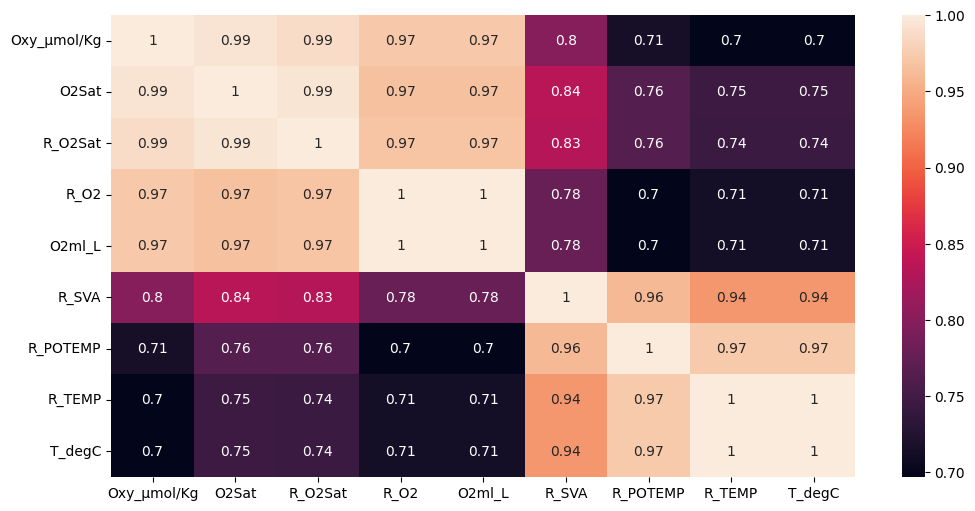

In [88]:
corr = df_ocean.corr()
top = corr.index[abs(corr['R_TEMP'] > 0.4)]
top_corr = df_ocean[top].corr()
plt.figure(figsize = (12,6))
sns.heatmap(top_corr, annot = True)

<Axes: >

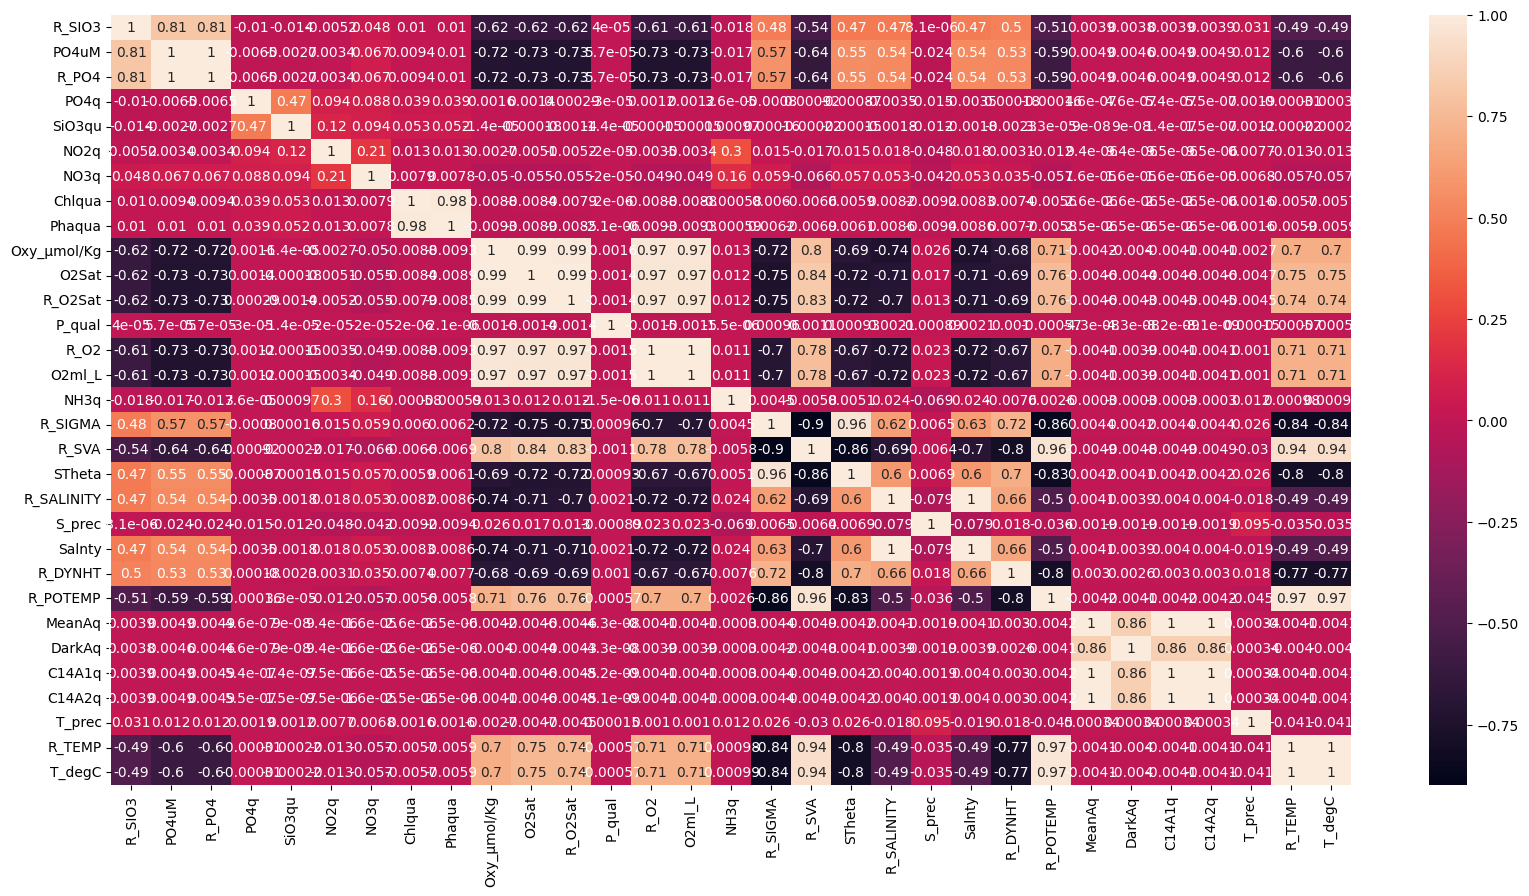

In [89]:
# Consider all variables
corr = df_ocean.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

Identify columns which have negative correlation and Positive correlation. And separate out columns name

In [90]:
pos = corr.index[abs(corr['R_TEMP'] > 0)]
neg = corr.index[abs(corr['R_TEMP'] < 0)]

In [91]:
pos

Index(['Oxy_µmol/Kg', 'O2Sat', 'R_O2Sat', 'R_O2', 'O2ml_L', 'NH3q', 'R_SVA',
       'R_POTEMP', 'R_TEMP', 'T_degC'],
      dtype='object')

In [92]:
neg

Index(['R_SIO3', 'PO4uM', 'R_PO4', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'Chlqua',
       'Phaqua', 'P_qual', 'R_SIGMA', 'STheta', 'R_SALINITY', 'S_prec',
       'Salnty', 'R_DYNHT', 'MeanAq', 'DarkAq', 'C14A1q', 'C14A2q', 'T_prec'],
      dtype='object')

Data Bifurcation based on Positive & Negative Values of Correlation
Explanation:
Copying the DataFrame:

Use positive = df_ocean[pos].copy() to create a deep copy of the subset of df_ocean. This avoids modifying the original DataFrame inadvertently.
Checking for Column Existence:

Before attempting to drop 'NH3q', check if it exists in the DataFrame columns with if 'NH3q' in positive.columns:.
Dropping the Column:

If 'NH3q' exists, drop it using positive.drop('NH3q', axis=1, inplace=True).
By following this approach, you ensure that the column 'NH3q' is only dropped if it exists, thereby avoiding potential errors.

DDropping loosely related columns

In [93]:
import pandas as pd

# Assuming df_ocean and pos are already defined
positive = df_ocean[pos].copy()

# Check if 'NH3q' exists before dropping
if 'NH3q' in positive.columns:
    positive.drop('NH3q', axis=1, inplace=True)

print(positive.head())

   Oxy_µmol/Kg      O2Sat   R_O2Sat      R_O2    O2ml_L  R_SVA  R_POTEMP  \
0   148.808694  57.103779  57.19294  3.392498  3.392468  233.0     10.50   
1   148.808694  57.103779  57.19294  3.392498  3.392468  232.5     10.46   
2   148.808694  57.103779  57.19294  3.392498  3.392468  232.8     10.46   
3   148.808694  57.103779  57.19294  3.392498  3.392468  234.1     10.45   
4   148.808694  57.103779  57.19294  3.392498  3.392468  234.0     10.45   

   R_TEMP  T_degC  
0   10.50   10.50  
1   10.46   10.46  
2   10.46   10.46  
3   10.45   10.45  
4   10.45   10.45  


Explanation:
Creating a Copy:

negative = df_ocean[neg].copy() creates a deep copy of the subset of df_ocean. This prevents changes to the original DataFrame.
Dropping Columns:

A list columns_to_drop contains the columns you want to drop.
Loop through each column in columns_to_drop and check if it exists in negative.columns before dropping it. This avoids KeyError if the column does not exist.
Printing the Head of the DataFrame:

print(negative.head()) displays the first few rows of the negative DataFrame.
By following this approach, you ensure that the specified columns are only dropped if they exist in the DataFrame, thereby avoiding potential errors.








In [94]:
import pandas as pd

# Assuming df_ocean and neg are already defined
negative = df_ocean[neg].copy()

# List of columns to drop
columns_to_drop = ['S_prec', 'T_prec', 'P_qual', 'NO3q']

# Drop the columns if they exist in the DataFrame
for column in columns_to_drop:
    if column in negative.columns:
        negative.drop(column, axis=1, inplace=True)

# Display the first few rows of the DataFrame
print(negative.head())

      R_SIO3     PO4uM     R_PO4  PO4q  SiO3qu  NO2q  Chlqua  Phaqua  R_SIGMA  \
0  26.606862  1.564747  1.564736   9.0     9.0   9.0     9.0     9.0    25.64   
1  26.606862  1.564747  1.564736   9.0     9.0   9.0     9.0     9.0    25.65   
2  26.606862  1.564747  1.564736   9.0     9.0   9.0     9.0     9.0    25.65   
3  26.606862  1.564747  1.564736   9.0     9.0   9.0     9.0     9.0    25.64   
4  26.606862  1.564747  1.564736   9.0     9.0   9.0     9.0     9.0    25.64   

   STheta  R_SALINITY  Salnty  R_DYNHT  MeanAq  DarkAq  C14A1q  C14A2q  
0  25.649      33.440  33.440     0.00     9.0     9.0     9.0     9.0  
1  25.656      33.440  33.440     0.01     9.0     9.0     9.0     9.0  
2  25.654      33.437  33.437     0.02     9.0     9.0     9.0     9.0  
3  25.643      33.420  33.420     0.04     9.0     9.0     9.0     9.0  
4  25.643      33.421  33.421     0.04     9.0     9.0     9.0     9.0  


Plot Data

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [96]:
x = positive.drop('R_TEMP', axis = 1)
y = positive[['R_TEMP']]
x_new = x.copy()
y_new = y.copy()

In [97]:
x_new1 = scaler.fit_transform(x_new)
x_new1 = pd.DataFrame(x_new1, columns = x.columns)

In [98]:
x_new1.describe()

,Oxy_µmol/Kg,O2Sat,R_O2Sat,R_O2,O2ml_L,R_SVA,R_POTEMP,T_degC
count,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000
mean,0.306999,0.267058,0.267474,0.305431,0.305428,0.322897,0.348179,0.315141
std,0.162220,0.151427,0.151880,0.166980,0.166979,0.132631,0.132374,0.141981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187008,0.147526,0.147059,0.170557,0.170557,0.214056,0.253372,0.211448
50%,0.306999,0.267058,0.267474,0.305431,0.305428,0.314056,0.334939,0.292593
75%,0.464218,0.412698,0.415500,0.471275,0.471275,0.430454,0.439627,0.417172
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
x_new1.head()

,Oxy_µmol/Kg,O2Sat,R_O2Sat,R_O2,O2ml_L,R_SVA,R_POTEMP,T_degC
0,0.306999,0.267058,0.267474,0.305431,0.305428,0.340556,0.337187,0.305051
1,0.306999,0.267058,0.267474,0.305431,0.305428,0.339824,0.335902,0.303704
2,0.306999,0.267058,0.267474,0.305431,0.305428,0.340264,0.335902,0.303704
3,0.306999,0.267058,0.267474,0.305431,0.305428,0.342167,0.335581,0.303367
4,0.306999,0.267058,0.267474,0.305431,0.305428,0.342020,0.335581,0.303367


In [100]:
# Similarly for dependent variable

scale2 = MinMaxScaler()
y_new = scale2.fit_transform(y)
y_new

array([[0.30505051],
       [0.3037037 ],
       [0.3037037 ],
       ...,
       [0.58080808],
       [0.56296296],
       [0.54175084]])

It is always best practice to scale out DV and IV variable separately

Train test Split

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_new1, y_new, test_size = 0.2, random_state = 1)

In [102]:
X_train.shape, X_test.shape

((691890, 8), (172973, 8))

In [103]:
# We will measure Mean Absolute Vaue Error, to find error of Model
from sklearn.metrics import mean_absolute_error as mae

In [104]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [105]:
predictions = my_model.predict(X_test)

print("Mean Absolute Error : " + str(mae(predictions, y_test)))

Mean Absolute Error : 0.0006240733840042782


This is not bad performance, i was looking for Hyerparameter Tuning, But Now I will stick to basic Model.¶
Analysis with Negatively Correlated data

In [106]:
negative.head()

,R_SIO3,PO4uM,R_PO4,PO4q,SiO3qu,NO2q,Chlqua,Phaqua,R_SIGMA,STheta,R_SALINITY,Salnty,R_DYNHT,MeanAq,DarkAq,C14A1q,C14A2q
0,26.606862,1.564747,1.564736,9.0,9.0,9.0,9.0,9.0,25.64,25.649,33.440,33.440,0.00,9.0,9.0,9.0,9.0
1,26.606862,1.564747,1.564736,9.0,9.0,9.0,9.0,9.0,25.65,25.656,33.440,33.440,0.01,9.0,9.0,9.0,9.0
2,26.606862,1.564747,1.564736,9.0,9.0,9.0,9.0,9.0,25.65,25.654,33.437,33.437,0.02,9.0,9.0,9.0,9.0
3,26.606862,1.564747,1.564736,9.0,9.0,9.0,9.0,9.0,25.64,25.643,33.420,33.420,0.04,9.0,9.0,9.0,9.0
4,26.606862,1.564747,1.564736,9.0,9.0,9.0,9.0,9.0,25.64,25.643,33.421,33.421,0.04,9.0,9.0,9.0,9.0


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [108]:
x_new11 = scaler.fit_transform(x_new1)
x_new11 = pd.DataFrame(x_new11, columns = x_new1.columns)
x_new11.head()

,Oxy_µmol/Kg,O2Sat,R_O2Sat,R_O2,O2ml_L,R_SVA,R_POTEMP,T_degC
0,0.306999,0.267058,0.267474,0.305431,0.305428,0.340556,0.337187,0.305051
1,0.306999,0.267058,0.267474,0.305431,0.305428,0.339824,0.335902,0.303704
2,0.306999,0.267058,0.267474,0.305431,0.305428,0.340264,0.335902,0.303704
3,0.306999,0.267058,0.267474,0.305431,0.305428,0.342167,0.335581,0.303367
4,0.306999,0.267058,0.267474,0.305431,0.305428,0.342020,0.335581,0.303367


In [109]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data for demonstration
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'R_TEMP': [30, 25, 35, 40, 20]
}

# Creating the DataFrame
negative = pd.DataFrame(data)

# Dropping 'R_TEMP' and setting up predictors and target
x1 = negative.drop('R_TEMP', axis=1)
y1 = negative[['R_TEMP']]

# Making copies of predictors and target (optional)
x_new1 = x1.copy()
y_new1 = y1.copy()

# Initializing the MinMaxScaler and scaling the target variable
scale3 = MinMaxScaler()
y_new11 = scale3.fit_transform(y_new1)

# Display the results
print("Scaled Target Variable (y_new11):")
print(y_new11)


Scaled Target Variable (y_new11):
[[0.5 ]
 [0.25]
 [0.75]
 [1.  ]
 [0.  ]]


In [110]:
scale3 = MinMaxScaler()
y_new11 = scale3.fit_transform(y_new1)
y_new11

array([[0.5 ],
       [0.25],
       [0.75],
       [1.  ],
       [0.  ]])

Convert Data

Explanation:
Drop Rows with Missing Values: The lines depth_vector = depth_vector[~np.isnan(temperature)] and temperature = temperature[~np.isnan(temperature)] drop rows with missing values in both arrays simultaneously using boolean indexing.
After handling missing values, you can proceed with fitting the linear regression model and plotting the data. Make sure to handle missing values appropriately based on your dataset and analysis requirements.

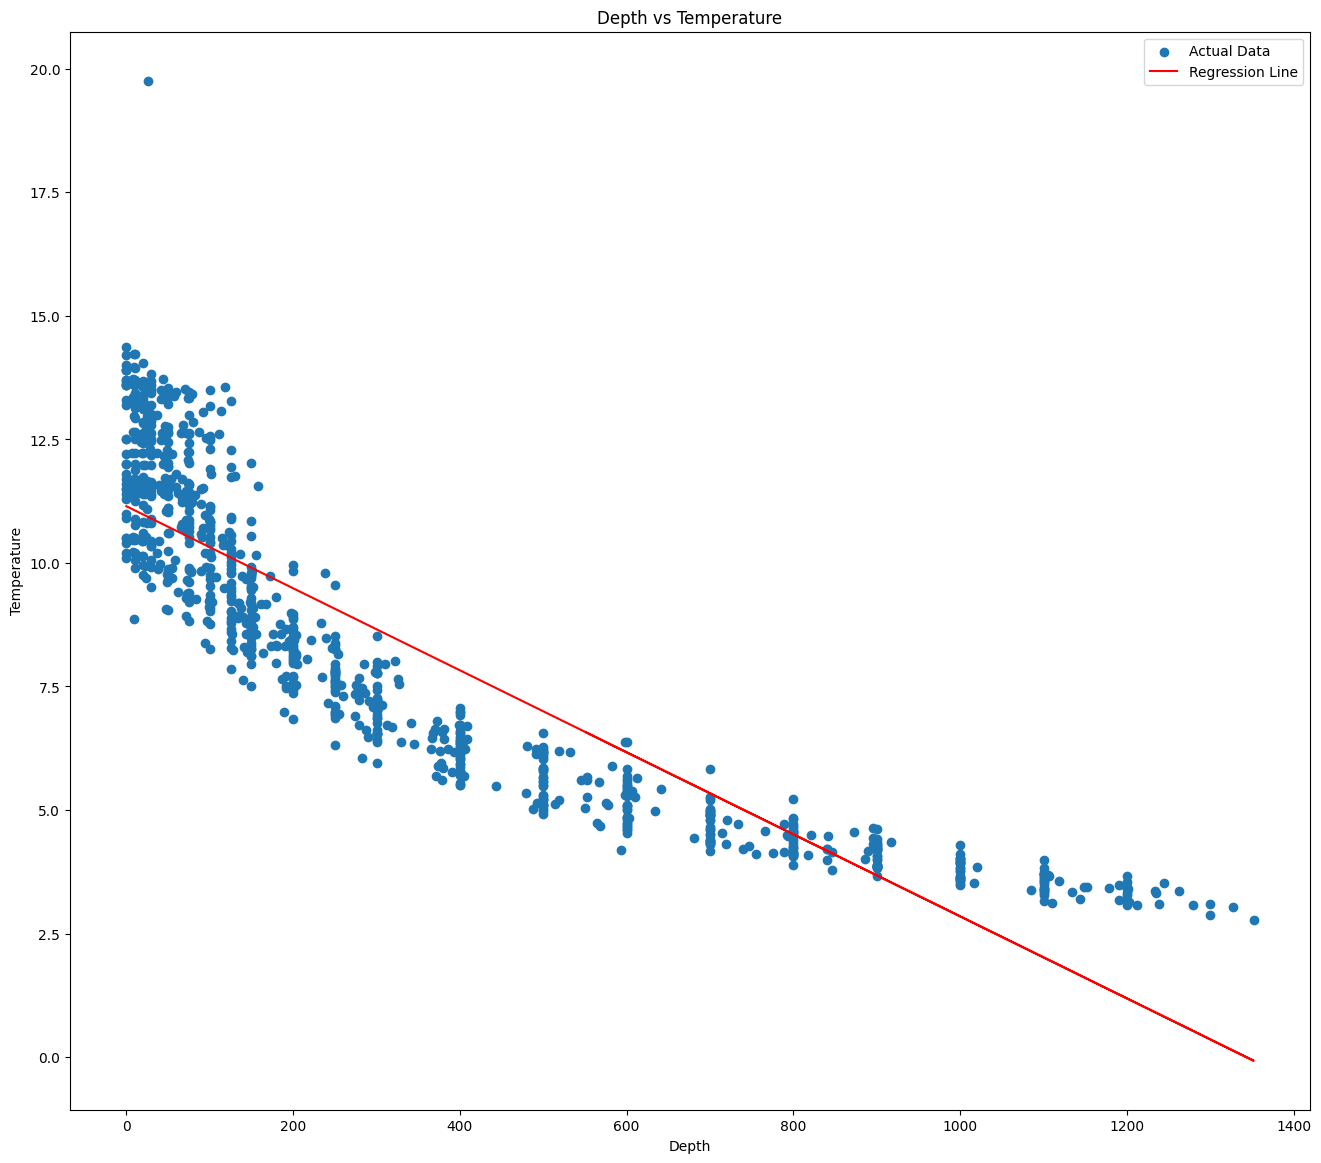

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming depth_vector and temperature are defined as numpy arrays
# Drop rows with missing values
depth_vector = depth_vector[~np.isnan(temperature)]
temperature = temperature[~np.isnan(temperature)]

# Reshape depth_vector if needed
depth_vector = depth_vector.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression().fit(depth_vector, temperature)

# Predict temperature using the fitted model
prediction = model.predict(depth_vector)

# Plot the original data points
plt.scatter(depth_vector, temperature, label='Actual Data')

# Plot the regression line
plt.plot(depth_vector, prediction, color="red", label='Regression Line')

# Add labels and title
plt.xlabel('Depth')
plt.ylabel('Temperature')
plt.title('Depth vs Temperature')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [113]:
x_train, x_test, y_train, y_test = train_test_split(depth_vector, temperature, train_size=.8, test_size=.2)

print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_train shape {x_test.shape}")
print(f"y_train shape {y_test.shape}")

X_train shape (798, 1)
y_train shape (798,)
X_train shape (200, 1)
y_train shape (200,)


Plot the training data

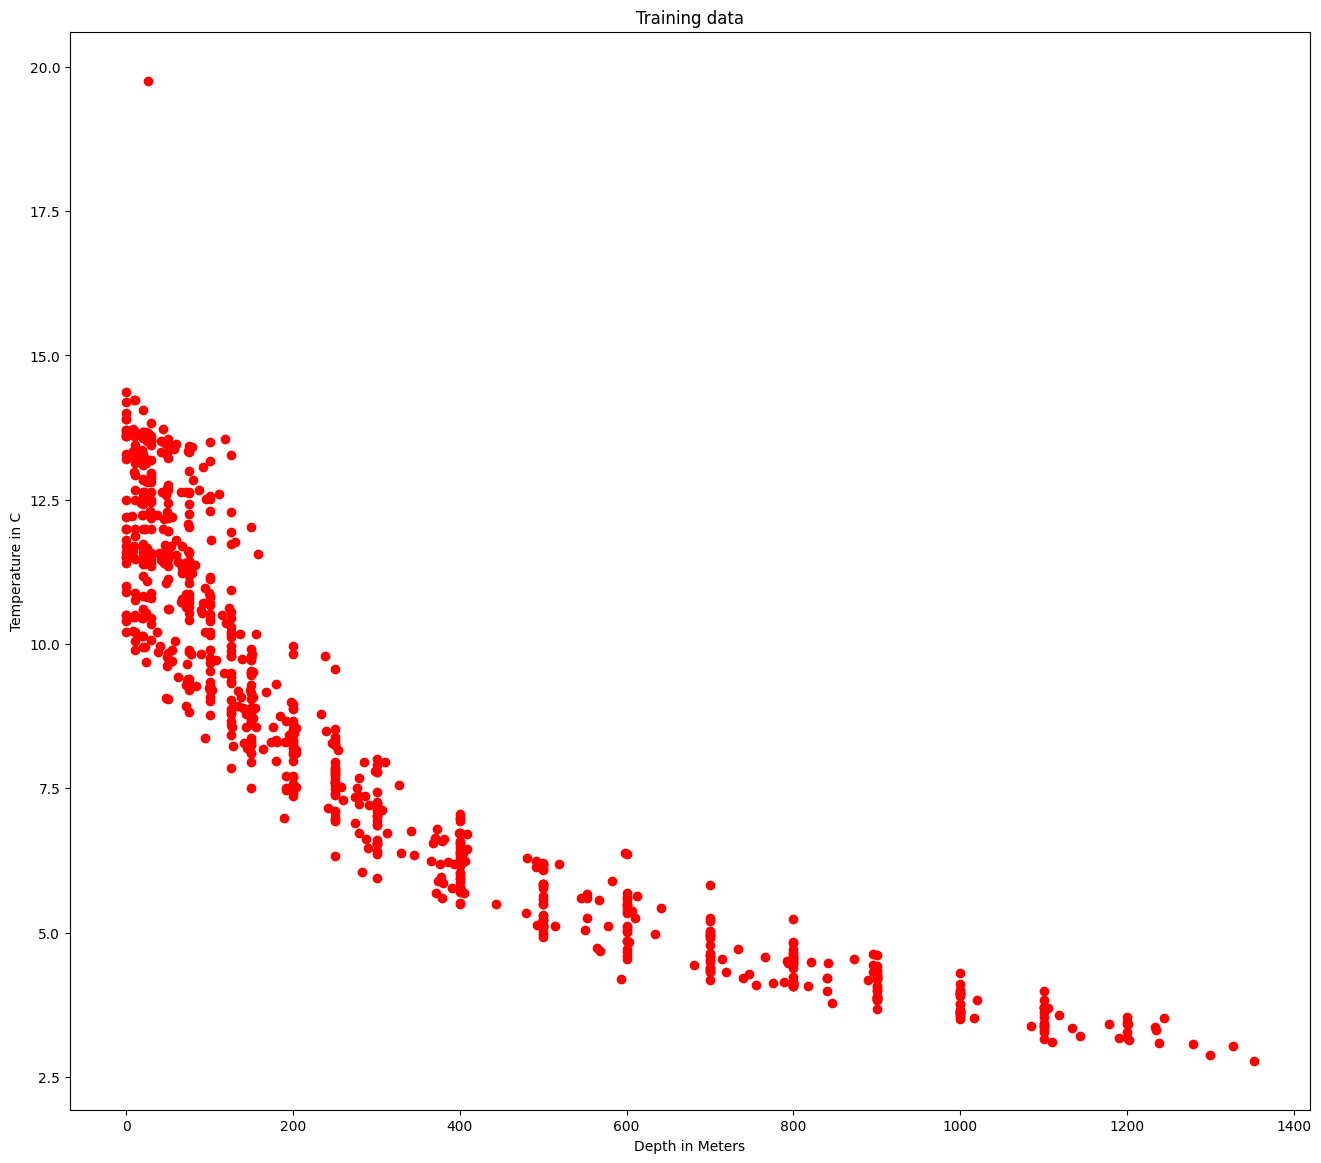

In [114]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Depth in Meters')
plt.ylabel('Temperature in C')
plt.title('Training data')
plt.show()

Plot the testing data

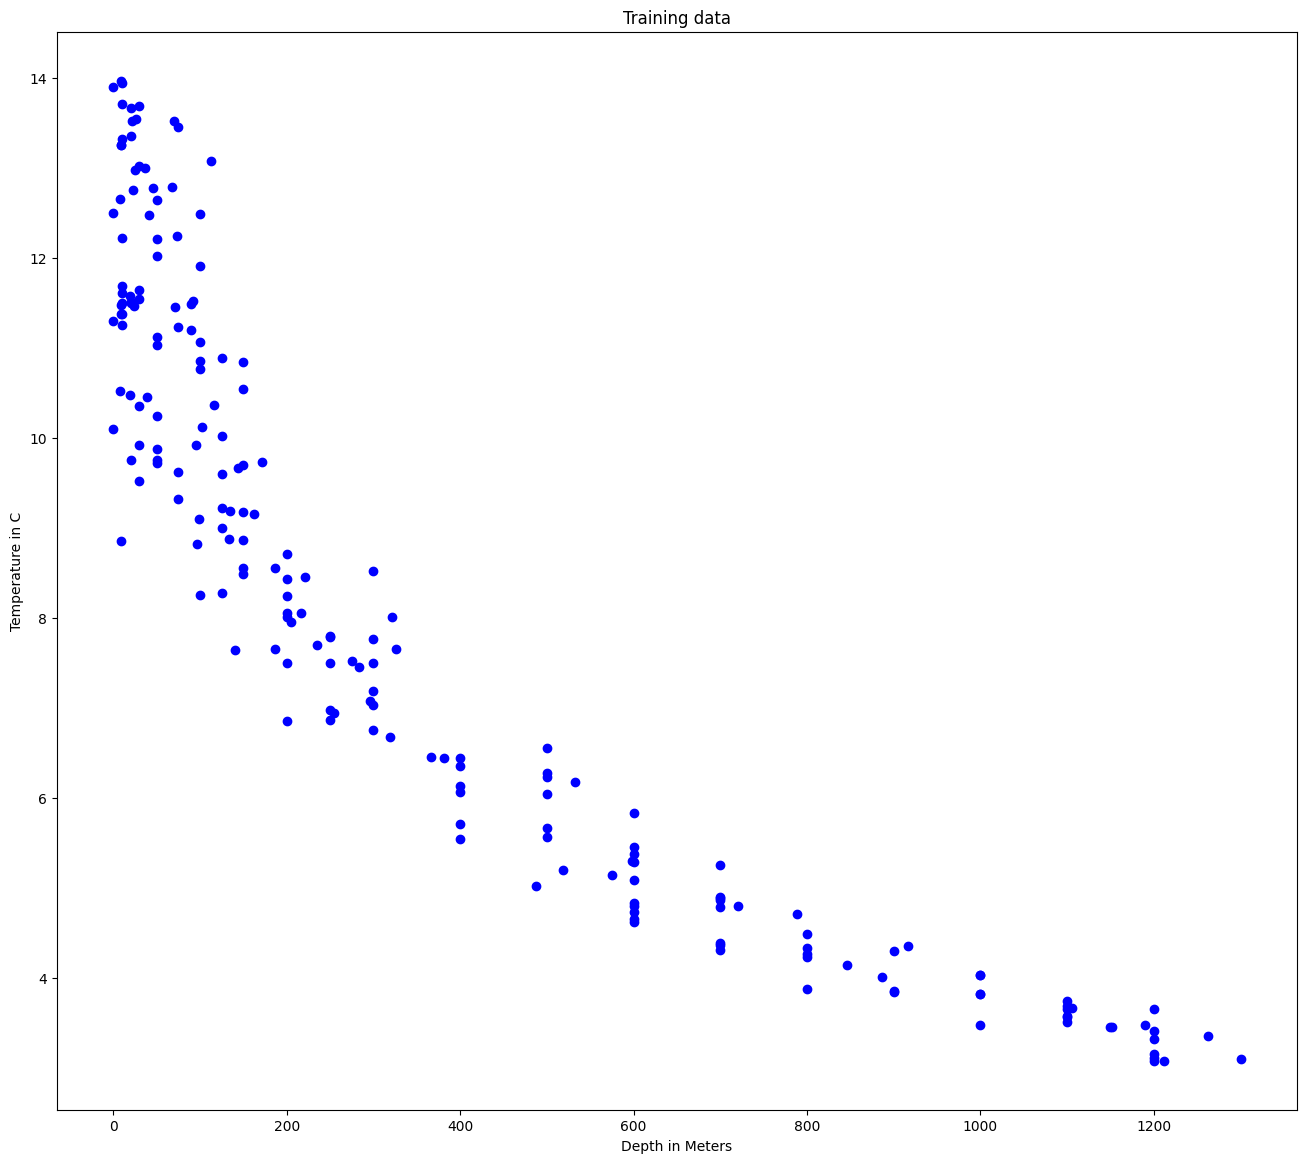

In [115]:
plt.scatter(x_test, y_test, color='blue')
plt.xlabel('Depth in Meters')
plt.ylabel('Temperature in C')
plt.title('Training data')
plt.show()

Regression model score

In [116]:
from sklearn.linear_model import LinearRegression

# Assuming x_train, y_train, and x_test are already defined

# Fit the linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

# Make predictions on the test data
y_predict = lm.predict(x_test)

# Calculate and print the R-squared value
train_accuracy = lm.score(x_train, y_train)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of x_train: (798, 1)
Shape of y_train: (798,)


In [117]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")

Train accuracy 78.82 %


Three Conclusions¶
The regression model is not that accurate because the line of best fit is linear and not polynomial
The temperature of water on the coast of California decreases with the increasing depth of the water
The rate of the decrease in temperature is not constant and appears to be more parabolic, decreasing more slowly as the depth increases